### DS102 | In Class Practice Week 3A - Pivot Table & Matplotlib Introduction
<hr>
At the end of the lesson, you will be able to:

- Use the Pivot Table function from the pandas library
- Understand how matplotlib plots work
- How to read documentation on pandas and matplotlib


### Pivot Table
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
feedback = [
    {
        'classid':1,
        'instructor': 'instructor1',
        'coordinating_ta':'ta1',
        'rating':8,
        'classtype':'101'
    },
    {
        'classid':2,
        'instructor': 'instructor1',
        'coordinating_ta':'ta1',
        'rating':7,
        'classtype':'101'
    },
     {
        'classid':3,
        'instructor': 'instructor1',
        'coordinating_ta':'ta2',
        'rating':9,
        'classtype':'102'
    },
    {
        'classid':4,
        'instructor': 'instructor2',
        'coordinating_ta':'ta2',
        'rating':9,
        'classtype':'102'
    },
    {
        'classid':5,
        'instructor': 'instructor2',
        'coordinating_ta':'ta1',
        'rating':10,
        'classtype':'101'
    },
]

# create a dataframe from the feedback list (of dictionaries). Each dictionary represents one row.
feedback_df = pd.DataFrame(feedback)
feedback_df

,classid,classtype,coordinating_ta,instructor,rating
0,1,101,ta1,instructor1,8
1,2,101,ta1,instructor1,7
2,3,102,ta2,instructor1,9
3,4,102,ta2,instructor2,9
4,5,101,ta1,instructor2,10


In [11]:
# create a pivot table from feedback df (fill in index, columns and values variables)

pivot_table_result = pd.pivot_table(feedback_df, 
                                    index = ["instructor"], 
                                    columns = ["coordinating_ta"], 
                                    values = "rating",
                                   aggfunc = np.sum)
pivot_table_result

coordinating_ta,ta1,ta2
instructor,,
instructor1,15,9
instructor2,10,9


In [12]:
?pd.pivot_table

<div class="alert alert-info">
    <div><b>When to use pivot table vs. groupby?</b></div><br/>
    <div>Pivot tables are powerful, and are a familiar interface for those that have experience with Excel. It is useful as a finished product of your analysis, because they are harder to manipulate. If you expect to do further analysis, groupby and aggregations may be more convenient instead.</div>
</div>

### Matplotlib Introduction

Matplotlib is one of the first and many visualisation libraries like Seaborn use the similar syntax. 

Pros:
1. Provides a standard for other visualisation libraries
2. Leveraged by many other libraries

Cons:
1. Documentation that is difficult to understand
2. Restrictive syntax

<img src="https://i.imgur.com/uYYgeZ3.png" width="300">

https://matplotlib.org/gallery/index.html

In [13]:
import random
def create_random_numbers():
    results = []
    for i in range(10):
        random_number = random.randrange(1, 101)
        results.append(random_number)
    return results

In [21]:
# create two series of random numbers
x = create_random_numbers()
y = create_random_numbers()


x.sort()
y.sort()
print('x is ' + str(x))
print('y is ' + str(y))
# sort and print both series

x is [8, 33, 34, 38, 41, 63, 68, 80, 82, 96]
y is [13, 25, 54, 72, 81, 86, 89, 93, 95, 97]


In [31]:
data = {
    'x_values': x, # each key-value pair denotes one df column
    'y_values': y
}
random_df = pd.DataFrame(data)
random_df.head()


,x_values,y_values
0,8,13
1,33,25
2,34,54
3,38,72
4,41,81


<function matplotlib.pyplot.show(*args, **kw)>

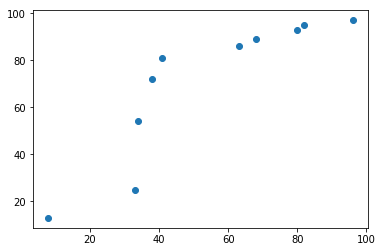

In [32]:
# Method 1: Use vanilla matplotlib (before pandas' df.plot() came along)
# Create a scatter plot
plt.scatter(x=x, y=y)
plt.show

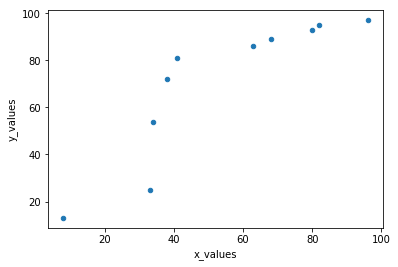

In [40]:
# Method 2: Use pandas DataFrame.plot()

random_df.plot(x='x_values', y='y_values', kind='scatter')

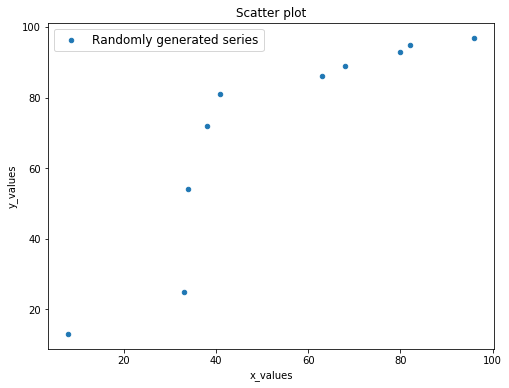

In [52]:
# And now, using matplotlib subplots and axes

# Create the figure
fig_dimensions=(8, 6)
fig = plt.figure(figsize = fig_dimensions)

# Add one plot
ax = fig.add_subplot(111)
random_df.plot(x='x_values', y='y_values', ax=ax, kind='scatter')

# Additional configuration
ax.set_title('Scatter plot')
ax.legend(["Randomly generated series"], fontsize=12)

plt.show()

https://matplotlib.org/api/axes_api.html#axis-labels-title-and-legend

### Introduction to the matplotlib layout

<img src="https://i.imgur.com/JrukTTS.png" width="300">

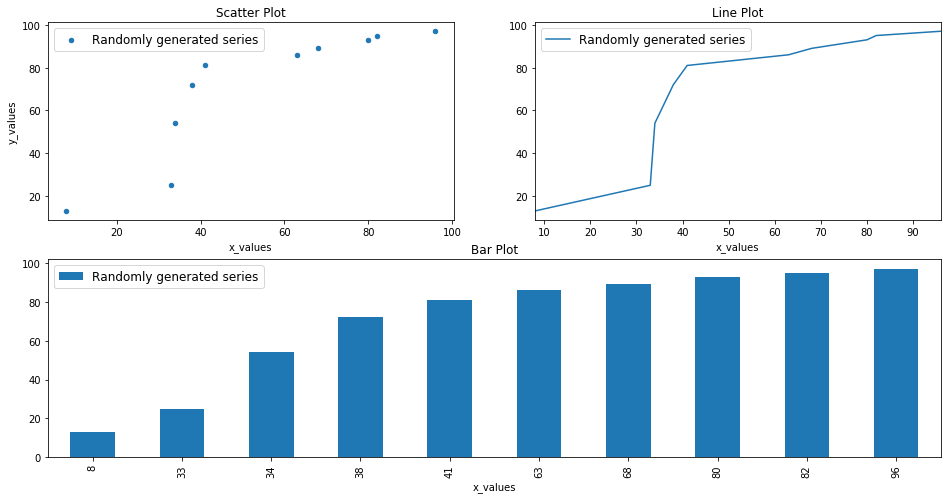

In [65]:
# Create the figure
fig_dimensions=(16, 8)
fig = plt.figure(figsize = fig_dimensions)

# Add one subplot
ax1 = fig.add_subplot(2,2,1)
random_df.plot(x='x_values', y = 'y_values', ax=ax1, kind = 'scatter')
ax1.set_title('Scatter Plot')
ax1.legend(['Randomly generated series'], fontsize=12)


# Add another subplot
ax2 = fig.add_subplot(2,2,2)
random_df.plot(x='x_values', y = 'y_values', ax=ax2, kind = 'line')
ax2.set_title('Line Plot')
ax2.legend(['Randomly generated series'], fontsize=12)

# Add third subplot beneath
ax3 = fig.add_subplot(2,1,2)
random_df.plot(x='x_values', y = 'y_values', ax=ax3, kind = 'bar')
ax3.set_title('Bar Plot')
ax3.legend(['Randomly generated series'], fontsize=12)


plt.show()

### Self-Study

Want to customise or allocate spacing between subplots? 

To explore further, see matplotlib documentation for `.subplots_adjust()` [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots_adjust.html). The parameters of interest are `hspace` and `wspace`.

In [ ]:
# Add this line between figure creation and subplot addition
# plt.subplots_adjust(hspace=0.3, wspace=0.3)